# Optimal number of topics with correlation


In [3]:
library(ggplot2)
library("dplyr")
library(viridis)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite


In [13]:
error = c()
max_cor_exp = c()
max_cor_sig = c()

nosig = c(5,10,20,40,80)
x = 1
cor_exp_list = list()
cor_sig_list = list()
for( i in nosig){
    load(paste0("modelssaved/three_sample_f",i,"_s5K_l500_norm_i1000.RData"))
    error[x] = out$gkl

    cor_exp_list[[x]] = cor(out$exposures)
    diag(cor_exp_list[[x]]) = 0

    cor_sig_list[[x]] = cor(t(out$signatures))
    diag(cor_sig_list[[x]]) = 0
    x = x+1
}


In [39]:

for(i in 1:length(nosig)){
    # max_cor_exp[i] = mean(apply(cor_exp_list[[i]],1,max)) 
    # max_cor_sig[i] = mean(apply(cor_sig_list[[i]],1,max))

    # max_cor_exp[i] = max(cor_exp_list[[i]]) 
    # max_cor_sig[i] = max(cor_sig_list[[i]])

    # max_cor_exp[i] = median(cor_exp_list[[i]]) 
    # max_cor_sig[i] = median(cor_sig_list[[i]])

    max_cor_exp[i] = mean(cor_exp_list[[i]]) 
    max_cor_sig[i] = mean(cor_sig_list[[i]])
}

dat1 = data.frame(x = nosig, error = error, cexp = max_cor_exp, csig = max_cor_sig)

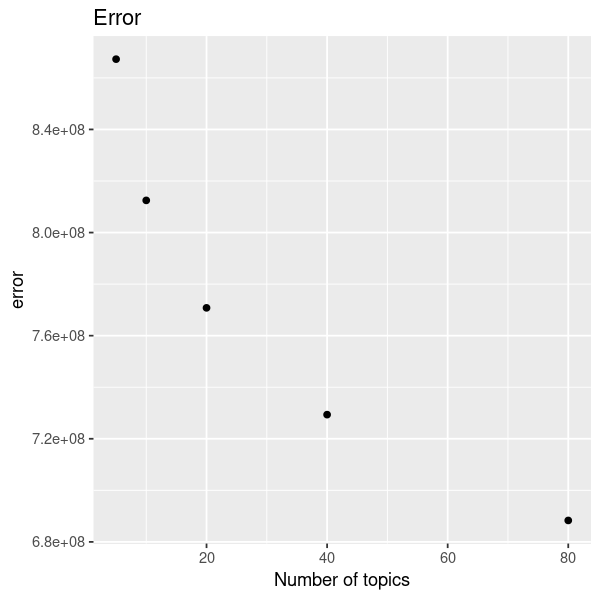

In [26]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(dat1, aes(x = x, y = error))+
geom_point()+ xlab('Number of topics') + ylab('error') +
ggtitle("Error")


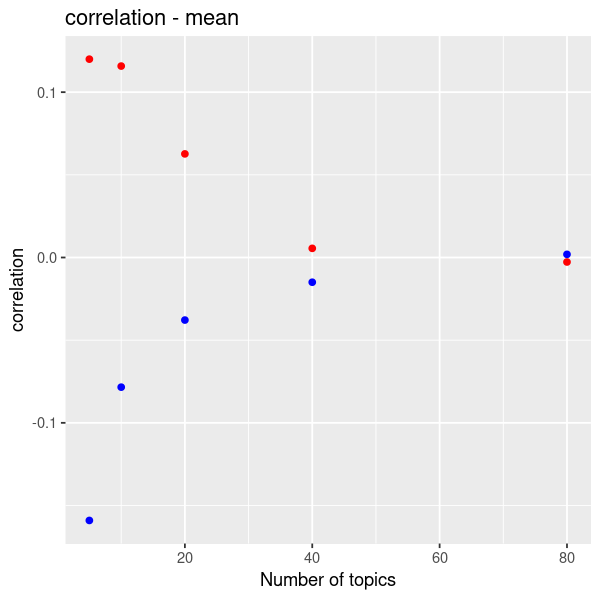

In [40]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(dat1, aes(x = x))+
geom_point(aes(y = max_cor_exp), col = "blue")+ 
geom_point(aes(y = max_cor_sig), col = "red")+
xlab('Number of topics') + ylab('correlation') +
ggtitle("correlation - mean")

# Correlation between topics 

In [1]:
load("modelssaved/cellpose_f20_b150_l500_1e10.RData")

In [3]:
cor_topics = cor(out$exposures)

In [18]:
load("modelssaved/three_sample_f20_nmfgen_iter1000.RData")
regout = out
load("modelssaved/three_sample_f20_s5K_l300_norm_i1000.RData")
sout = out

In [19]:
cor_topics = cor(t(regout$signatures),t(sout$signatures))
cor_weights = cor(regout$exposures,sout$exposures)

In [20]:
cbind(c(1:20),cor_weights[,6],cor_topics[,6])

1,0.029102469,0.091407254
2,-0.003712002,0.003036011
3,-0.291335600,-0.013301022
4,0.009685991,0.039924098
5,0.069346103,0.153526965
6,0.051722430,-0.010792422
7,0.025078574,-0.006896456
8,0.094303050,0.503712066
9,0.034087853,-0.010610664
10,0.034885594,-0.023894361
11,-0.217183913,-0.017242793


In [5]:
# write.csv(data.frame(cor_topics), "resultplots/corr_topics_l500.csv", row.names=FALSE)

# Testing how correlation is affected by lengthscale

In [8]:
#load("modelssaved/LH1000_l005_f10.RData")
#dats = out
load("modelssaved/LH1000_l005_noreg.RData")
dat0 = out
load("modelssaved/LH500_l002.RData")
dats2 = out
load("modelssaved/LH500_l0002.RData")
dats3 = out
load("modelssaved/LH_distmat.RData")

In [2]:
source("model/NMFbatch.R")

### The distance from lengthscale 

\begin{align*}
\exp(-0.002*dist) &= 0.5 \\
dist &= -\frac{1}{0.002} \log(0.5) \\
dist &\approx 150
\end{align*}

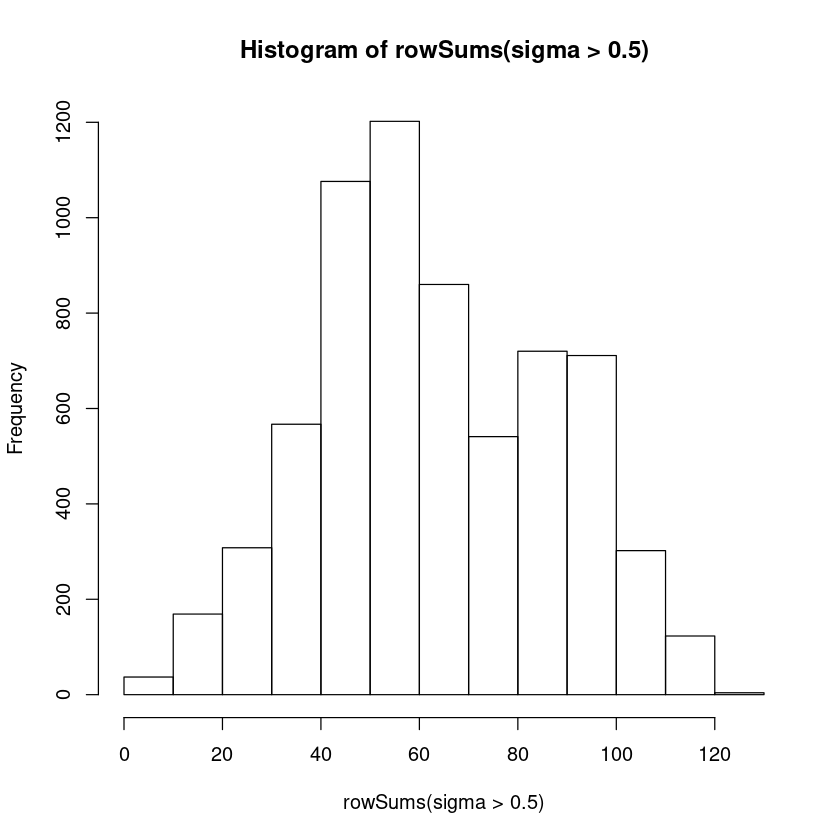

In [9]:
sigma = exp(-0.002*dist)
hist(rowSums(sigma>0.5))

In [5]:
# the different correlations
c0 = cor(t(dat0$exposures))
mean(c0[sigma > 0.5| sigma < 1])
cs2 = cor(t(dats2$exposures))
mean(cs2[sigma > 0.5| sigma < 1])
cs3 = cor(t(dats3$exposures))
mean(cs3[sigma > 0.5 | sigma < 1])


[1] 0.02631616

[1] 0.3046027

[1] 0.5729635

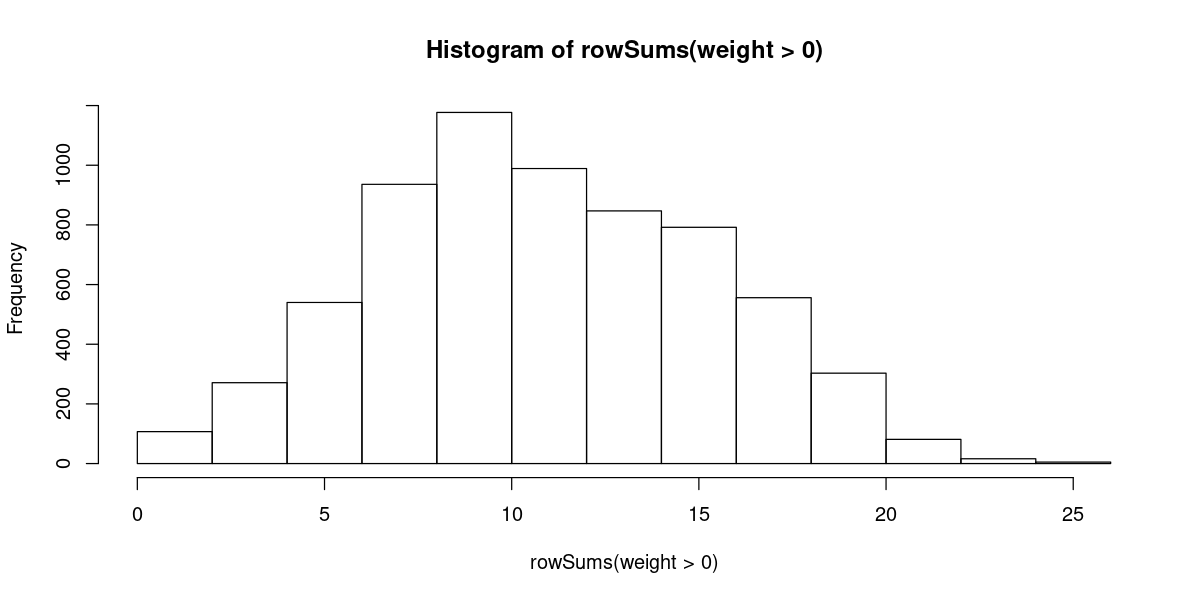

In [8]:
weight = exp(-0.005*dist)
weight[weight < 0.5] = 0
weight = weight/rowSums(weight)

hist(rowSums(weight>0))

It is known that if you have data $X$ with covariance $\Sigma$, then $WX$ will have covariance $W\Sigma W^T$.

In [9]:
cormean = c()
posmean = c()
wmat = diag(nrow(weight))
for(i in 1:200){
    wmat =  weight%*%wmat%*%t(weight)
    D = sqrt(diag(wmat))
    cormat =  t(wmat/D) /D
    cormean[i] = mean(cormat[sigma > 0.5 | sigma < 1])
    posmean[i] = mean(cormat[sigma > 0.5 | sigma < 1] > 0)
}



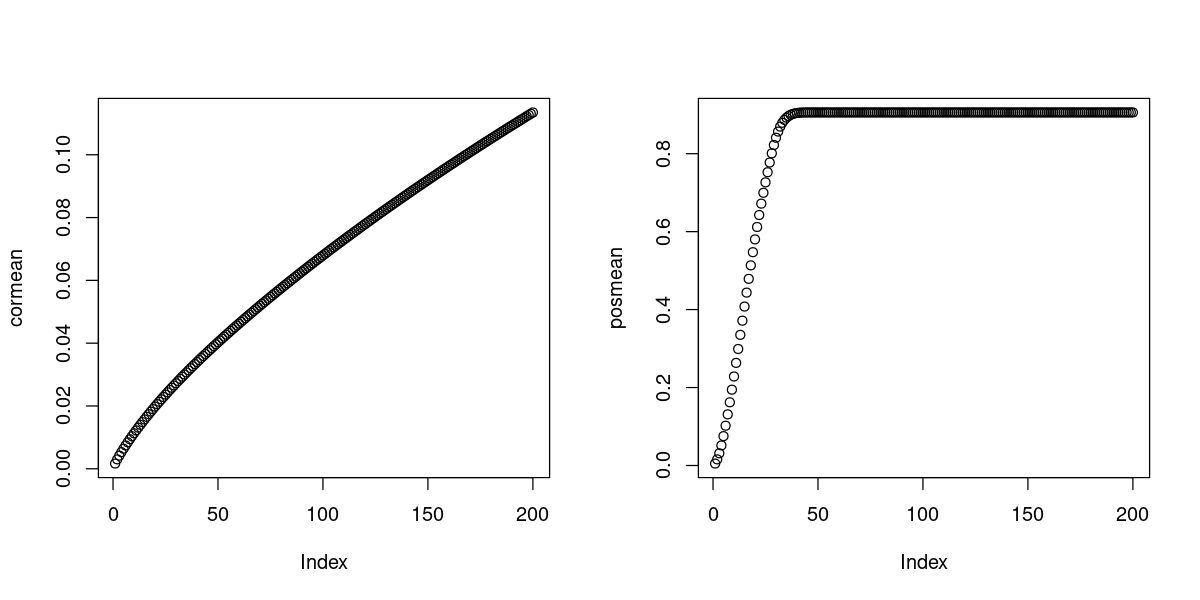

In [10]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cormean)
plot(posmean)


### The correlation for NMF weights 

In [10]:
library(Rcpp)
library(RcppArmadillo)
sourceCpp("model/NMFspatial2.cpp")

# load the data count
count = read.csv('data/LH_counts.csv', header = T)
count = as.matrix(count)
count = count[,-1]

genes = colnames(count)

data = count
data = data/rowSums(data)




In [21]:
dim(dist)

[1] 6620 6620

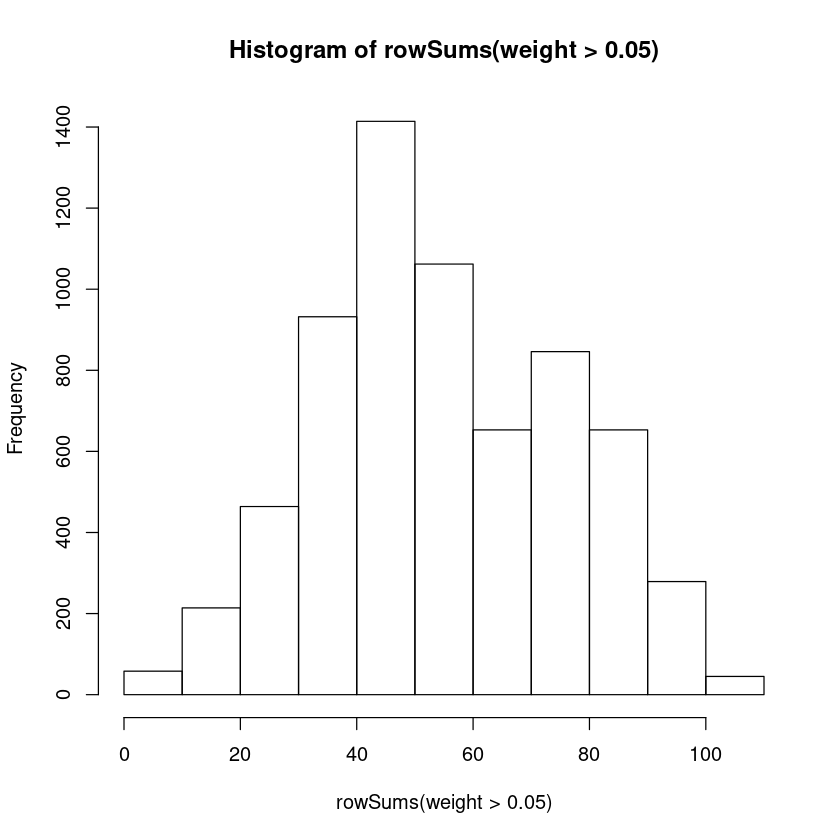

In [26]:
sigma = exp(-0.005*dist)
sigma[sigma < 0.2] = 0


hist(rowSums(weight>0.05))

weight = weight/rowSums(weight)

In [35]:
out0 = nmfspatial(data, 10,weight = weight, initial = 1, smallIter = 100, maxiter = 100)
corNMF = c()
errorNMF = c()
c0 = cor(t(out0$exposures))
corNMF[1] = mean(c0[sigma > 0.5| sigma < 1])
errorNMF[1] = out0$gkl

for(i in 2:100){
    out = nmftrain(data, out0$exposures, out0$signatures, weight = weight, iter = i)
    c0 = cor(t(out$exposures))
    corNMF[i] = mean(c0[sigma > 0.5| sigma < 1])
    errorNMF[i] = out$gkl
    out0 = out
}

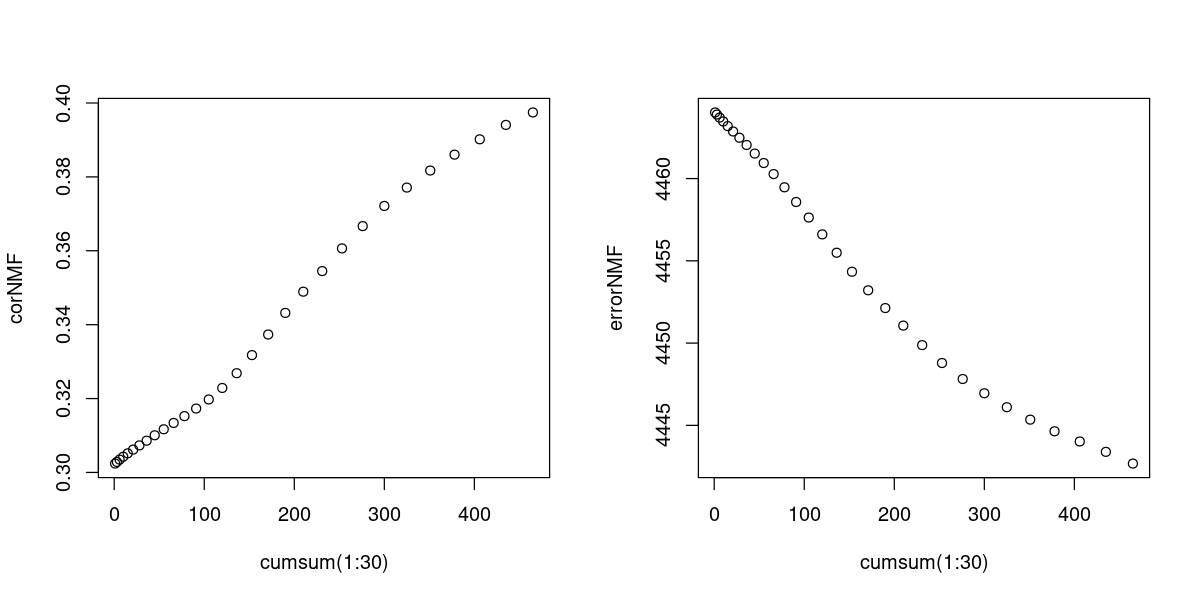

In [28]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cumsum(1:30),corNMF)
plot(cumsum(1:30),errorNMF)

In [31]:
location = read.csv('data/LH_location.csv', header = T, row.names = 1)

In [32]:
data.frame()

,X0,X1
0,43443.45,-17527.58
1,42733.65,-17539.46
2,43969.78,-17519.23
3,42925.67,-17528.40
4,43738.71,-17534.82
5,42150.53,-17525.61


## More neighbors included

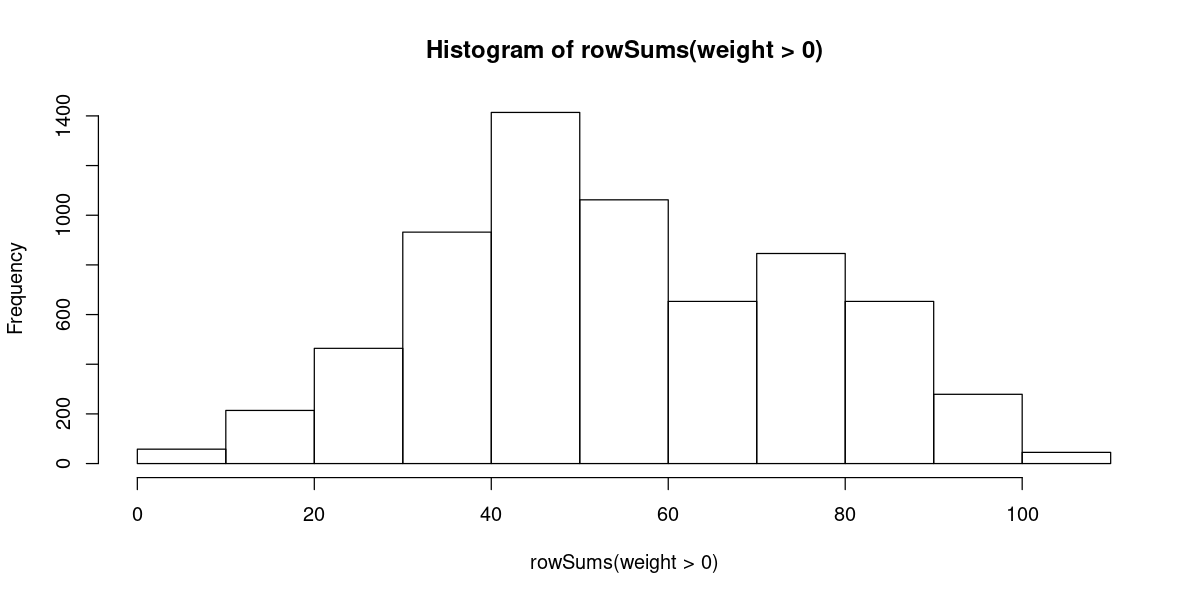

In [42]:
weight = exp(-0.005*dist)
weight[weight < 0.2] = 0
weight = weight/rowSums(weight)

hist(rowSums(weight>0))

In [43]:
out0 = nmfspatial(data, 10,weight = weight, initial = 1, smallIter = 100, maxiter = 100)
corNMF = c()
errorNMF = c()
c0 = cor(t(out0$exposures))
corNMF[1] = mean(c0[sigma > 0.5| sigma < 1])
errorNMF[1] = out0$gkl

for(i in 2:30){
    out = nmftrain(data, out0$exposures, out0$signatures, weight = weight, iter = i)
    c0 = cor(t(out$exposures))
    corNMF[i] = mean(c0[sigma > 0.5| sigma < 1])
    errorNMF[i] = out$gkl
    out0 = out
}

In [ ]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(cumsum(1:30),corNMF)
plot(cumsum(1:30),errorNMF)